In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

#  테스트데이터를 통해 승객의 생존 여부를 예측하는 것이 과제

## 데이터 확인하기

In [3]:
def bar_chart(feature):
    # 각 column(=feature)에서 생존자 수 count
    survived = train[train['Survived']==1][feature].value_counts()
    
    # 각 column(=feature)에서 사망자 수 count
    dead = train[train['Survived']==0][feature].value_counts()
    
    # 생존자수, 사망자수를 하나의 dataframe으로 묶는다.
    df = pd.DataFrame([survived, dead])
    
    # 묶은 dataframe의 인덱스명(행 이름)을 지정한다.
    df.index = ['Survived', 'Dead']
    
    # plot을 그린다.
    df.plot(kind='bar', stacked=True, figsize=(10,5))
#return df

In [512]:
#bar_chart('Sex')
#bar_chart('Pclass')
#bar_chart('Embarked')
#bar_chart('SibSp')

In [4]:
data = [train, test]

## Name

In [5]:
# 혼인여부, 성별 파악 가능 
for dataset in data:
    dataset['Title']=dataset['Name'].str.extract('([\w]+)\.', expand=False)

In [6]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [7]:

for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                                 'Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [8]:
for dataset in data:
    dataset['Title'] = dataset['Title'].apply(lambda x: 0 if x=="Mr" else 1 if x=="Miss" else 2 if x=="Mrs" else 3 if x=="Master" else 4)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


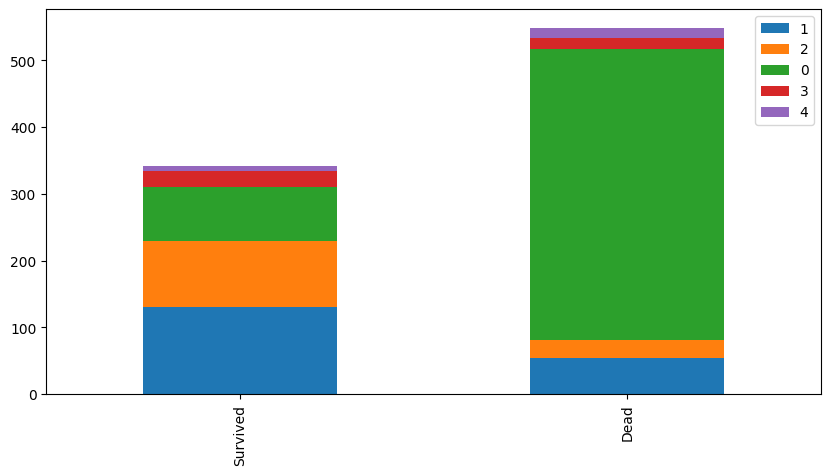

In [9]:
bar_chart('Title')

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Sex Feature

In [11]:
sex_mapping = {"male":0, "female":1}
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


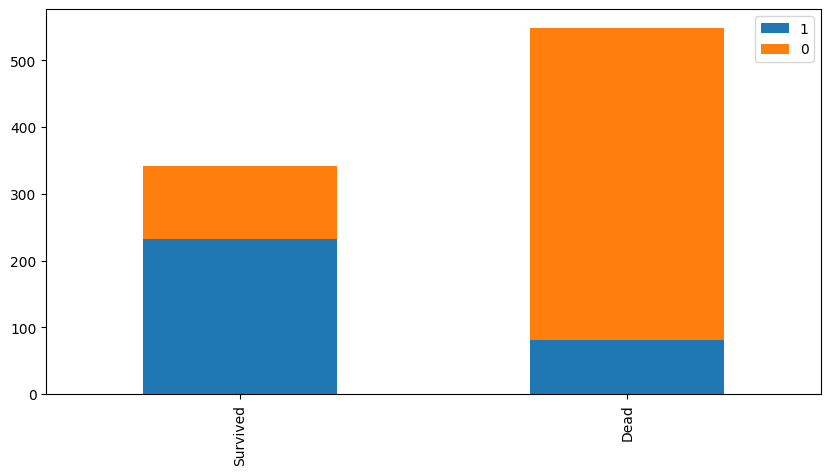

In [12]:
bar_chart('Sex') # 남자의 사망율이 더 높다

## Embarked Feature

In [13]:
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna('S') # NaN을 S로 채운다(대부분의 승객이 S에서 탑승했으므로)

In [14]:
embarked_mapping={'S':0, 'C':1, 'Q':2}
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0


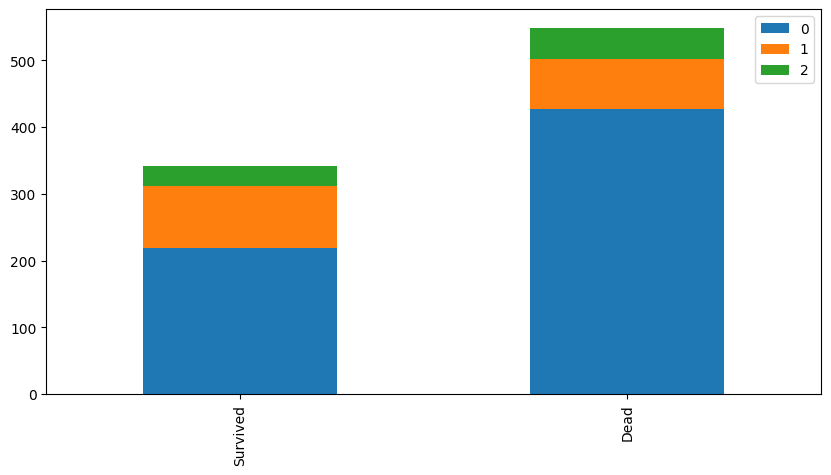

In [15]:
bar_chart('Embarked') # S에서 탑승한 승객이 많으니 두 지표다 S가 많은게 어떻게보면 당연

## Age Feature

In [16]:
for dataset in data:
    dataset['Age'].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True)

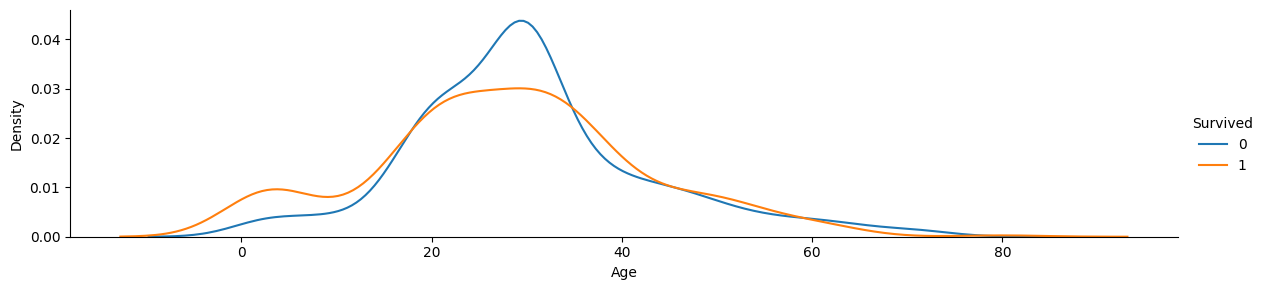

In [17]:
g = sns.FacetGrid(train, hue="Survived", aspect=4)
g = (g.map(sns.kdeplot, "Age").add_legend()) # add_legend()는 범주를 추가하는 파라미터이다.

In [18]:
for dataset in data:
    dataset['Ageband'] = pd.cut(dataset['Age'], 5, labels=[0,1,2,3,4])

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Ageband          0
dtype: int64

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ageband
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2


## Fare Feature

In [21]:
for dataset in data:
    dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median")
                           ,inplace=True)

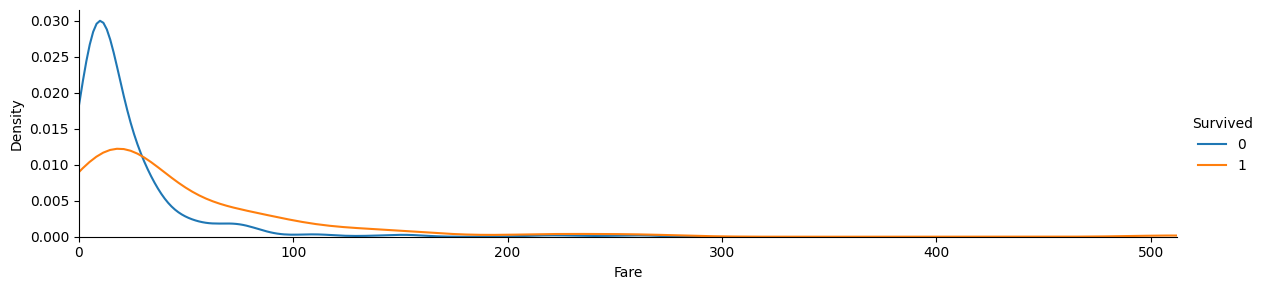

In [22]:
g = sns.FacetGrid(train, hue="Survived", aspect=4)
g = (g.map(sns.kdeplot, "Fare")
     .add_legend() # 범주 추가
     .set(xlim=(0, train['Fare'].max()))) # x축 범위 설정

In [23]:
for dataset in data:
    dataset['Fareband'] = pd.qcut(dataset['Fare'], 4, labels=[0,1,2,3])

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ageband,Fareband
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,2,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,2,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,1


## SibSp & Parch Feature (Family)

In [25]:
for dataset in data:
    dataset['Family']=dataset['Parch']+dataset['SibSp']+1
    dataset['IsAlone']=1
    dataset.loc[dataset['Family']>1, 'IsAlone']=0
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ageband,Fareband,Family,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,2,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,2,3,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,1,1,1


## Cabin Feature

In [26]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [27]:
for dataset in data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

<AxesSubplot: >

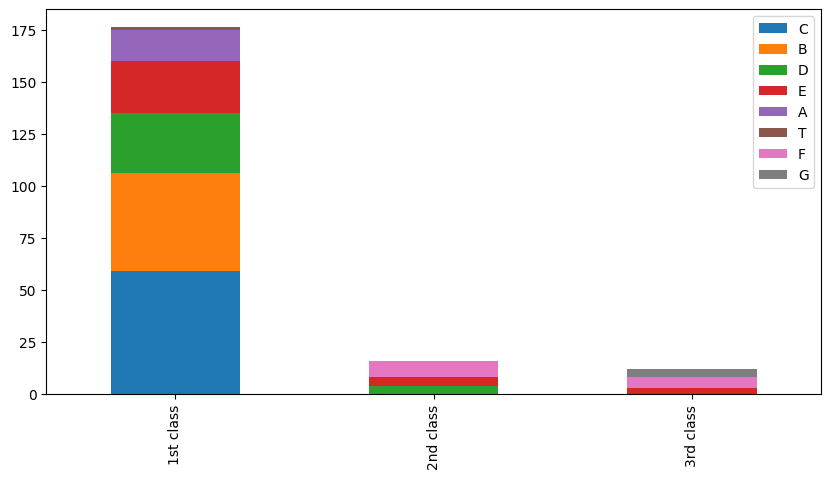

In [28]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [29]:
cabin_mapping = {'A':0, 
                 'B':0.4, 
                 'C':0.8, 
                 'D':1.2, 
                 'E':1.6, 
                 'F':2, 
                 'G':2.4, 
                 'T': 2.8}
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [30]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), 
                      inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),
                     inplace=True)

## 기타 데이터 정리

In [31]:
# 전처리가 끝났거나 훈련에 이용하지 않을 column은 삭제

drop_column = ['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare']

for dataset in data:
    dataset = dataset.drop(drop_column, axis=1, inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Cabin,Embarked,Title,Ageband,Fareband,Family,IsAlone
0,1,0,3,0,2.0,0,0,1,0,2,0
1,2,1,1,1,0.8,1,2,2,3,2,0
2,3,1,3,1,2.0,0,1,1,1,1,1
3,4,1,1,1,0.8,0,2,2,3,2,0
4,5,0,3,0,2.0,0,0,2,1,1,1


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Cabin        891 non-null    float64 
 5   Embarked     891 non-null    int64   
 6   Title        891 non-null    int64   
 7   Ageband      891 non-null    category
 8   Fareband     891 non-null    category
 9   Family       891 non-null    int64   
 10  IsAlone      891 non-null    int64   
dtypes: category(2), float64(1), int64(8)
memory usage: 64.9 KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   Cabin        418 non-null    float64 
 4   Embarked     418 non-null    int64   
 5   Title        418 non-null    int64   
 6   Ageband      418 non-null    category
 7   Fareband     418 non-null    category
 8   Family       418 non-null    int64   
 9   IsAlone      418 non-null    int64   
dtypes: category(2), float64(1), int64(7)
memory usage: 27.5 KB


## Modeling & Testing

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow import keras
import tensorflow as tf

import numpy

In [36]:
numpy.random.seed(3)
tf.random.set_seed(3)

drop_column2 = ['PassengerId', 'Survived']
train_data = train.drop(drop_column2, axis=1)
test_data = test.drop("PassengerId", axis=1)
target = train['Survived']

In [37]:
model=Sequential()

model.add(Dense(128, input_dim=9, activation='relu'))
model.add(BatchNormalization(-1))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.add(Dropout(0.1))
opt=keras.optimizers.Adam(learning_rate=0.005)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [38]:
model.fit(train_data, target, epochs=200)
print("\n Accuracy: %.4f" % (model.evaluate(train_data, target)[1]))

Epoch 1/200
28/28 [==============================] - 2s 7ms/step - loss: 1.2114 - accuracy: 0.7351
Epoch 2/200
28/28 [==============================] - 0s 7ms/step - loss: 1.1316 - accuracy: 0.7497
Epoch 3/200
28/28 [==============================] - 0s 7ms/step - loss: 0.8562 - accuracy: 0.7890
Epoch 4/200
28/28 [==============================] - 0s 7ms/step - loss: 1.0467 - accuracy: 0.7845
Epoch 5/200
28/28 [==============================] - 0s 7ms/step - loss: 0.9876 - accuracy: 0.7890
Epoch 6/200
28/28 [==============================] - 0s 7ms/step - loss: 0.9982 - accuracy: 0.7901
Epoch 7/200
28/28 [==============================] - 0s 7ms/step - loss: 1.1287 - accuracy: 0.7811
Epoch 8/200
28/28 [==============================] - 0s 7ms/step - loss: 0.9274 - accuracy: 0.8002
Epoch 9/200
28/28 [==============================] - 0s 9ms/step - loss: 0.9657 - accuracy: 0.7879
Epoch 10/200
28/28 [==============================] - 0s 9ms/step - loss: 0.8488 - accuracy: 0.7632
Epoch 11/

In [41]:
predict = model.predict(test_data)
predict=np.array(predict).flatten().tolist()

14/14 [==============================] - 0s 3ms/step


In [42]:
submission = pd.DataFrame({
    'PassengerId' : test['PassengerId'],
    'Survived' : predict})

submission.to_csv('submission_17010708.csv', index=False)
submission.head(10)

,PassengerId,Survived
0,892,0.148666
1,893,0.280545
2,894,0.001819
3,895,0.201542
4,896,0.413155
5,897,0.098217
6,898,0.459156
7,899,0.044319
8,900,0.501740
9,901,0.107219
